In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [2]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
total = pd.concat([train, test], axis=0)
print(train.shape, test.shape, total.shape)

(1095, 81) (365, 81) (1460, 81)


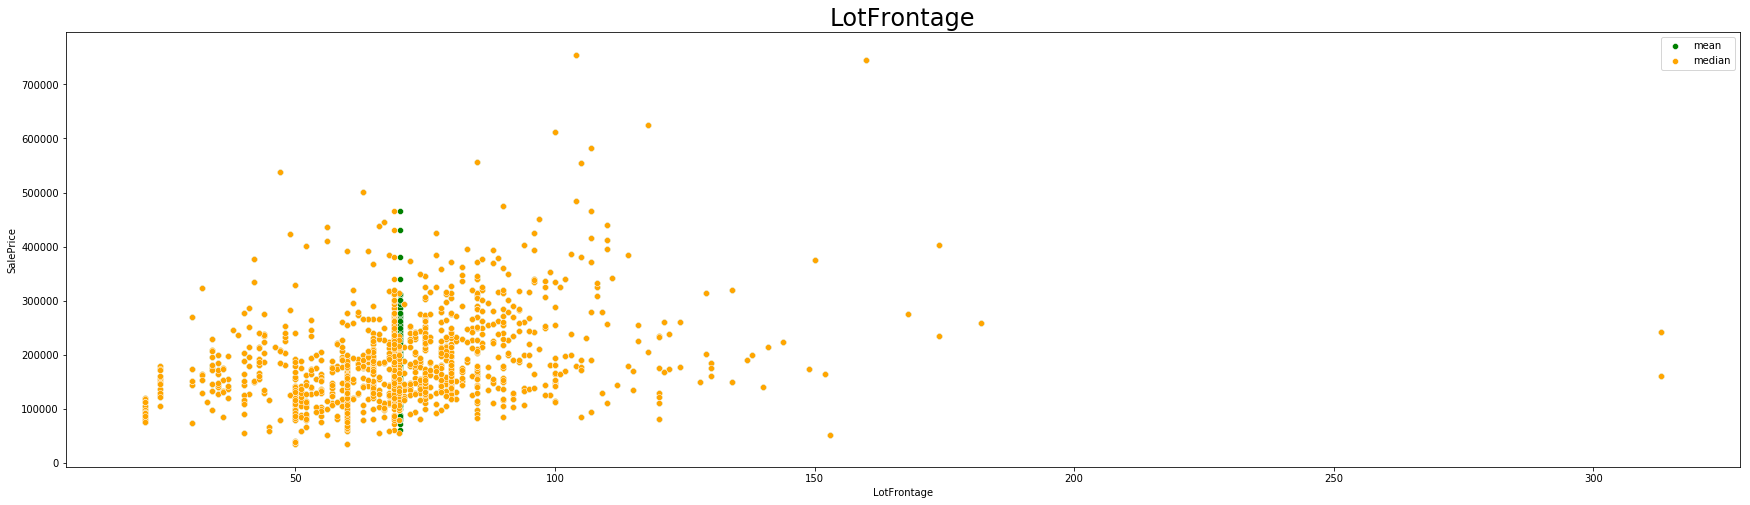

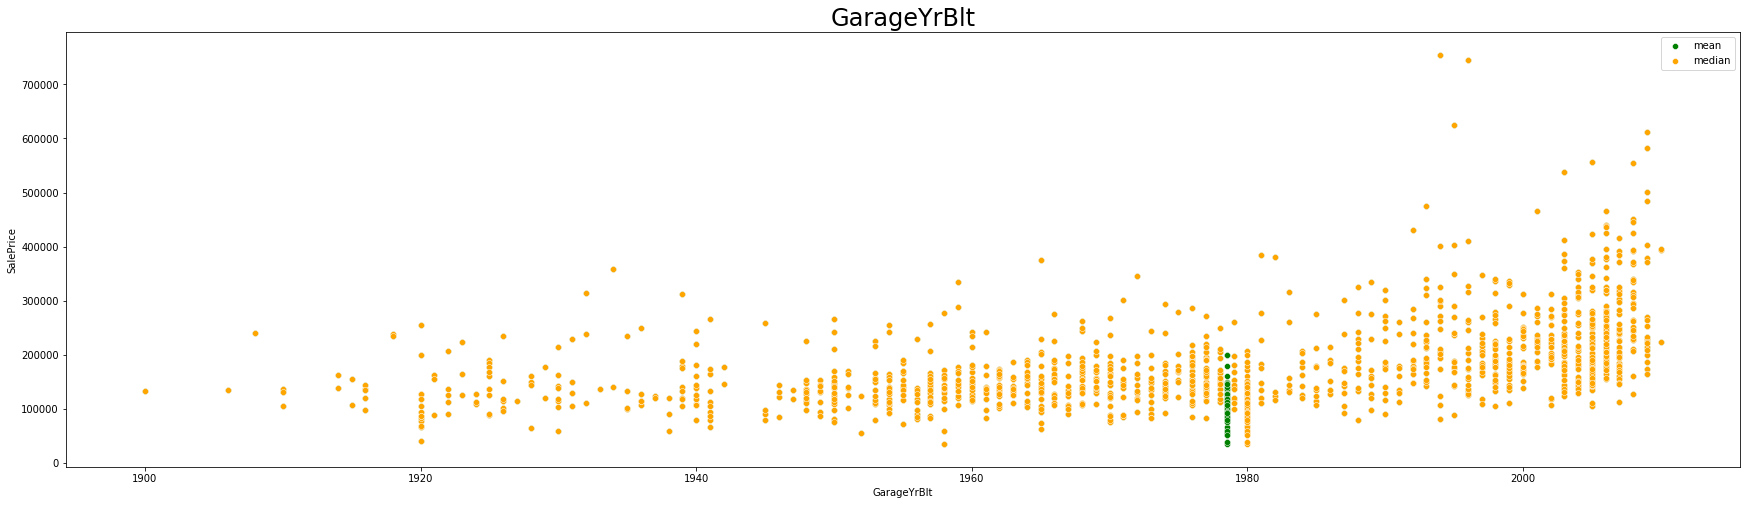

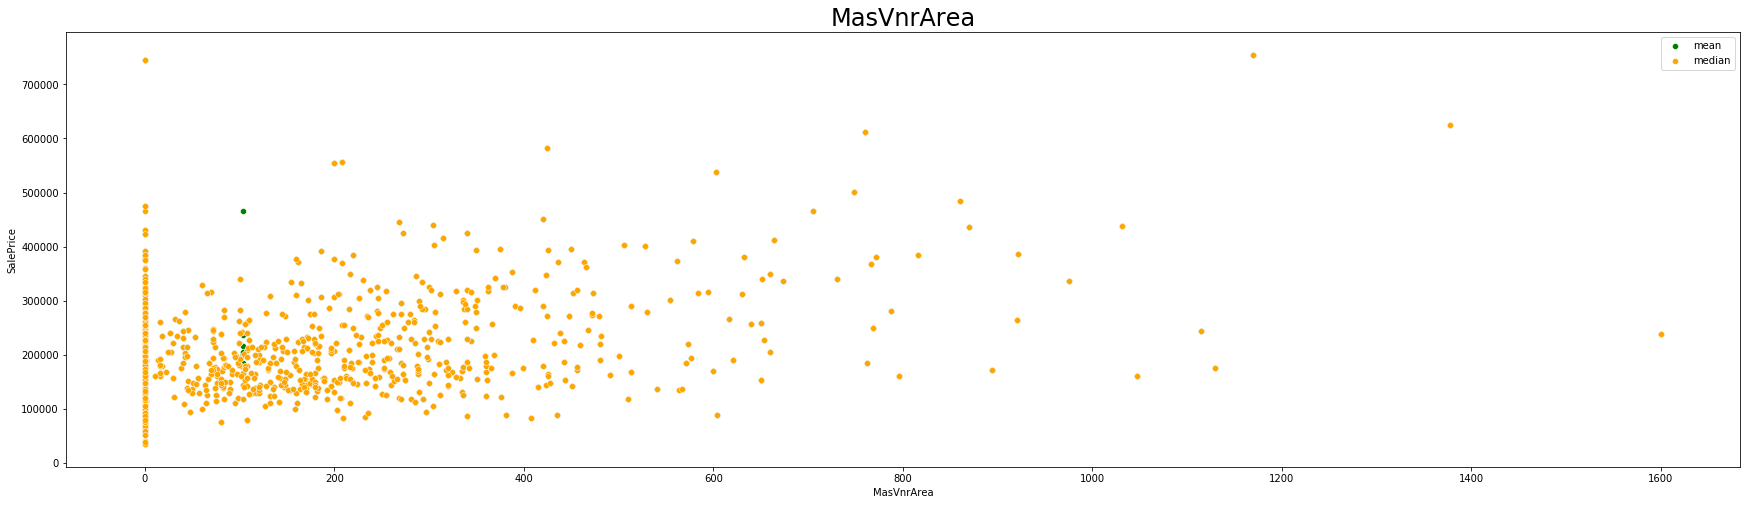

In [96]:
# 比較用mean, median填補後，相對其他數據的分布
def plt_scatter(total, analysis_feature):
    plt.figure(figsize=(30,8))
    na_mean = total[analysis_feature].mean()
    na_median = total[analysis_feature].median()
    x1 = total[analysis_feature].fillna(na_mean)
    x2 = total[analysis_feature].fillna(na_median)
    y = total['SalePrice']
#     plt.subplot(1,2,1)
    plt.title(analysis_feature, size=24)
    sns.scatterplot(x=x1, y=y, label='mean', color='green')
#     plt.subplot(1,2,2)
    sns.scatterplot(x=x2, y=y, label='median', color='orange')

analysis_feature = ['LotFrontage','GarageYrBlt', 'MasVnrArea'] 
for i in range(3):
    plt_scatter(total, analysis_feature[i])

## 分離目標

In [52]:
# 將目標分析欄位取出來
""" Your code hear: """
def plt_xy(total, analysis_feature):
    mean = total[analysis_feature].mean()
    median = total[analysis_feature].median()
    y = total[analysis_feature]
    y1 = total[analysis_feature].fillna(mean)
    y2 = total[analysis_feature].fillna(median)
    sns.histplot(data=y.values, kde=True, stat = 'probability', element = 'bars', label='origin', color='blue')
    sns.histplot(data=y1.values, kde=True, stat = 'probability', element = 'bars', label='mean', color='green')
    sns.histplot(data=y2.values, kde=True, stat = 'probability', element = 'bars', label='median', color='orange')
    plt.legend()

## 繪圖

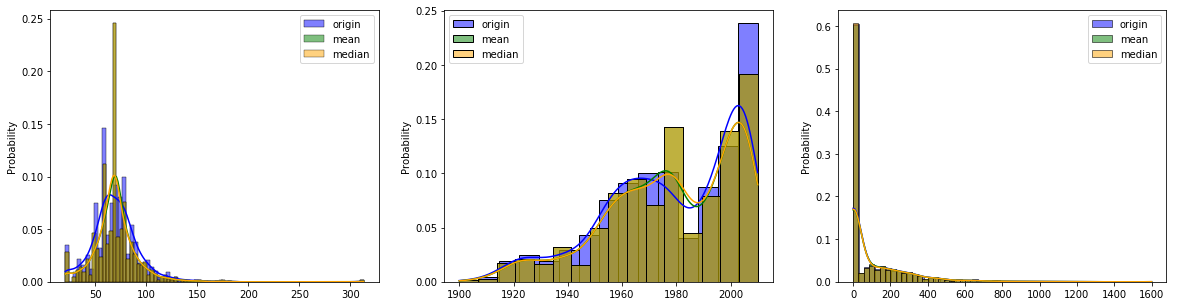

In [53]:
# 繪圖
""" Your code hear: """
fig = plt.figure(figsize = (20, 5))
analysis_feature = ['LotFrontage','GarageYrBlt', 'MasVnrArea'] 
for i in range(3):
    plt.subplot(1,3,i+1)
    plt_xy(total, analysis_feature[i])

## 分析標準差

In [70]:
""" Your code hear: """
def analy_std(total, analysis_feature):
    mean = total[analysis_feature].mean()
    median = total[analysis_feature].median()
    y_std = total[analysis_feature].std()
    y1_std = total[analysis_feature].fillna(mean).std()
    y2_std = total[analysis_feature].fillna(median).std()
    print(analysis_feature+':\n'+f'origin_std: {y_std:.2f}, ' + f'mean_std: {y1_std:.2f}, ' + f'median_std: {y2_std:.2f} \n')
    
for i in range(3):
    analy_std(total, analysis_feature[i])

LotFrontage:
origin_std: 24.28, mean_std: 22.02, median_std: 22.03 

GarageYrBlt:
origin_std: 24.69, mean_std: 23.99, median_std: 24.00 

MasVnrArea:
origin_std: 181.07, mean_std: 180.57, median_std: 180.73 



In [73]:
for item in analysis_feature:
    val = total[item].isnull().sum()
    print(f'{item:12} is  discrete.', end = ' ')
    print(f'Missing {val / total.shape[0] :.4%}')

LotFrontage  is  discrete. Missing 17.7397%
GarageYrBlt  is  discrete. Missing 5.5479%
MasVnrArea   is  discrete. Missing 0.5479%


## 透過分析標準差可以得到什麼結果？

In [ ]:
1. LotFrontage特徵的missing較多, 透過平均、中位數填補後，標準差變化大